In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
db=pd.read_csv('EV Charging Station Data.csv')
db

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,ObjectId2
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937,148132
148132,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938,148133
148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939,148134
148134,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940,148135


In [5]:
db.shape

(148136, 17)

In [7]:
db.isnull()

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,ObjectId2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
148132,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
148133,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
148134,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
db.isnull().sum()

Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               4
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
ObjectID                      0
ObjectId2                     0
dtype: int64

In [11]:
db.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
148131    False
148132    False
148133    False
148134    False
148135    False
Length: 148136, dtype: bool

In [13]:
db.duplicated().sum()

0

In [15]:
db.drop_duplicates()

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,ObjectId2
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937,148132
148132,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938,148133
148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939,148134
148134,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940,148135


In [17]:
db.fillna(0,inplace=True)
db

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,ObjectId2
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937,148132
148132,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938,148133
148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939,148134
148134,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940,148135


In [19]:
db.isnull().sum()

Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               0
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
ObjectID                      0
ObjectId2                     0
dtype: int64

In [29]:
def convert_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

In [33]:
db['Charging_Time__hh_mm_ss_'] = db['Charging_Time__hh_mm_ss_'].apply(convert_to_seconds)

In [35]:
x=db.iloc[:,-7:-5]
x

,Charging_Time__hh_mm_ss_,Energy__kWh_
0,7364,6.504
1,1459,2.481
2,13252,15.046
3,6869,6.947
4,1004,1.800
...,...,...
148131,702,1.194
148132,0,0.000
148133,1183,1.899
148134,1670,1.499


In [37]:
k=3

In [39]:
kmeans=KMeans(n_clusters=k,random_state=0)

In [41]:
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [43]:
centroids=kmeans.cluster_centers_

In [45]:
labels=kmeans.labels_

In [47]:
print(centroids)

[[2.98267220e+03 4.01121709e+00]
 [2.70863930e+04 3.81108481e+01]
 [1.00535174e+04 1.35522547e+01]]


In [49]:
print(labels)

[2 0 2 ... 0 0 2]


Text(0, 0.5, 'Energy')

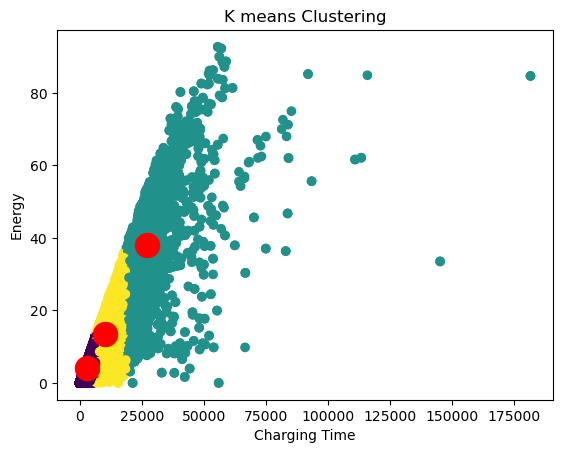

In [51]:
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=labels,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],s=300,c="red",marker='o')
plt.title("K means Clustering")
plt.xlabel("Charging Time")
plt.ylabel("Energy")

In [87]:
x=db.drop(columns=['Station_Name','Address','City','State_Province','Address','Start_Date___Time','Start_Time_Zone','End_Date___Time','End_Time_Zone','Port_Type','ObjectID','ObjectId2','Energy__kWh_'],axis=1)
y=db.iloc[:,-6]

In [89]:
x

,Zip_Postal_Code,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,GHG_Savings__kg_,Gasoline_Savings__gallons_
0,80301,7382,7364,2.732,0.816
1,80301,1474,1459,1.042,0.311
2,80301,33141,13252,6.319,1.888
3,80304,6891,6869,2.918,0.872
4,80302,1018,1004,0.756,0.226
...,...,...,...,...,...
148131,80304,733,702,0.848,0.150
148132,80303,67,0,0.000,0.000
148133,80303,1192,1183,1.349,0.238
148134,80305,1688,1670,1.064,0.188


In [91]:
db['Total_Duration__hh_mm_ss_'] = db['Total_Duration__hh_mm_ss_'].apply(convert_to_seconds)

AttributeError: 'int' object has no attribute 'split'

In [93]:
db['Total_Duration__hh_mm_ss_']

0          7382
1          1474
2         33141
3          6891
4          1018
          ...  
148131      733
148132       67
148133     1192
148134     1688
148135    34517
Name: Total_Duration__hh_mm_ss_, Length: 148136, dtype: int64

In [95]:
# Print the DataFrame to verify the changes
print("Modified DataFrame:")
print(db)

Modified DataFrame:
                     Station_Name            Address     City State_Province  \
0          BOULDER / JUNCTION ST1   2280 Junction Pl  Boulder       Colorado   
1          BOULDER / JUNCTION ST1   2280 Junction Pl  Boulder       Colorado   
2          BOULDER / JUNCTION ST1   2280 Junction Pl  Boulder       Colorado   
3            BOULDER / ALPINE ST1    1275 Alpine Ave  Boulder       Colorado   
4          BOULDER / BASELINE ST1    900 Baseline Rd  Boulder       Colorado   
...                           ...                ...      ...            ...   
148131  BOULDER / N BOULDER REC 1      3172 Broadway  Boulder       Colorado   
148132  BOULDER / CARPENTER PARK1       1505 30th St  Boulder       Colorado   
148133  BOULDER / CARPENTER PARK1       1505 30th St  Boulder       Colorado   
148134   BOULDER / REC CENTER ST2  1360 Gillaspie Dr  Boulder       Colorado   
148135   BOULDER / FACILITIES ST1   1745 14th street  Boulder       Colorado   

        Zip_Postal_

In [97]:
x

,Zip_Postal_Code,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,GHG_Savings__kg_,Gasoline_Savings__gallons_
0,80301,7382,7364,2.732,0.816
1,80301,1474,1459,1.042,0.311
2,80301,33141,13252,6.319,1.888
3,80304,6891,6869,2.918,0.872
4,80302,1018,1004,0.756,0.226
...,...,...,...,...,...
148131,80304,733,702,0.848,0.150
148132,80303,67,0,0.000,0.000
148133,80303,1192,1183,1.349,0.238
148134,80305,1688,1670,1.064,0.188


In [99]:
y

0          6.504
1          2.481
2         15.046
3          6.947
4          1.800
           ...  
148131     1.194
148132     0.000
148133     1.899
148134     1.499
148135    17.755
Name: Energy__kWh_, Length: 148136, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [103]:
from sklearn.linear_model import LinearRegression

In [105]:
lr=LinearRegression()

In [107]:
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)

In [109]:
lr.fit(X_train,Y_train)

LinearRegression()

In [115]:
x.size,y.size

(740680, 148136)

In [117]:
X_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(Y_test)

In [119]:
predictions= lr.predict(X_test)

In [121]:
r2=r2_score(Y_test,predictions)
print(f'R-squared: {r2}')

R-squared: 0.9999999376597412


In [123]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
model=DecisionTreeRegressor()
model.fit(X_test,Y_test)

DecisionTreeRegressor()

In [127]:
pred=model.predict(X_test)
pred2=model.predict(X_train)

In [129]:
test_score=r2_score(Y_test,pred)
print(f'R-squared: {test_score}')

R-squared: 1.0


In [131]:
train_score=r2_score(Y_train,pred2)
print(f'R-squared: {train_score}')

R-squared: 0.9999469793725462


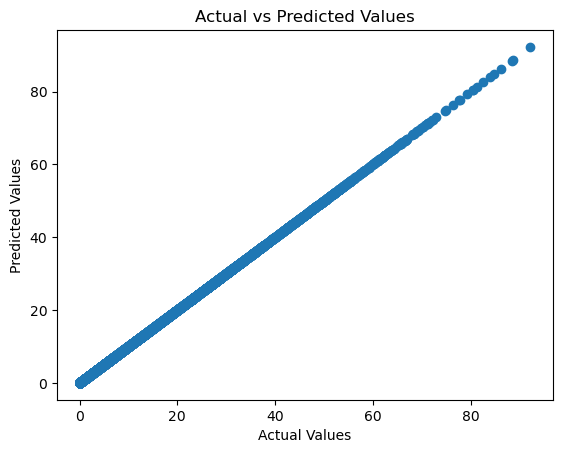

In [137]:
plt.scatter(Y_test, pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [143]:
input_data = (80304,733,702,0.848,0.150)

input_array = np.asarray(input_data)
input_reshaped = input_array.reshape(1, -1)
prediction = model.predict(input_reshaped)
print(prediction)

[1.194]


E:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
